In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Data load

In [3]:
data=pd.read_table('datos/datos.txt')

In [4]:
#data=pd.read_csv("datos2.csv")
#data=data.rename(columns={'Unnamed: 0':'No'})
#data=data.drop('No',axis=1)

In [5]:
data

,X,Y,RV
0,128.736,19.6,-289.157579
1,127.395,19.6,-288.746455
2,126.054,19.6,-289.568704
3,124.713,19.6,-285.548819
4,123.372,19.6,-283.950002
...,...,...,...
325,91.188,0.0,-261.612236
326,89.847,0.0,-264.124664
327,88.506,0.0,-264.764191
328,87.165,0.0,-263.530817


Bidimensional Data Display

(83.6784, 130.8816, -0.9800000000000001, 20.580000000000002)

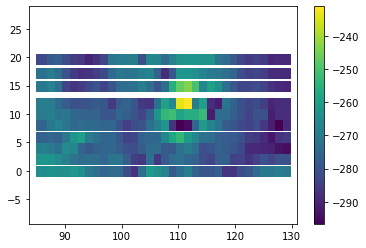

In [6]:
plt.scatter(data.X,data.Y,c=data.RV, s=100,marker='s')
plt.colorbar()
plt.axis('equal')

Second order Structure Function (Dr.Will):
$$S_{2}(l)=\langle {\vert \overrightarrow{v}(\overrightarrow{x}+\overrightarrow{l})-\overrightarrow{v}(\overrightarrow{x}) \vert}^{2}$$


In [7]:
df=data
dfn=df.to_numpy()
df=df.rename(columns={'X': 'RAdeg','Y':'DEdeg', 'RV':'vHa'})###########!!!!

df1 = pd.DataFrame({'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df.vHa, '_key': 1})
df2 = df1.copy()

In [8]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA    DE           V      RA_   DE_          V_
0 0  128.736  19.6 -289.157579  128.736  19.6 -289.157579
  1  128.736  19.6 -289.157579  127.395  19.6 -288.746455
  2  128.736  19.6 -289.157579  126.054  19.6 -289.568704
  3  128.736  19.6 -289.157579  124.713  19.6 -285.548819
  4  128.736  19.6 -289.157579  123.372  19.6 -283.950002

In [9]:
pc=1

In [10]:
pairs.loc[:, 'dDE'] = pc*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = pc*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]

In [12]:
pairs.head()

RA    DE           V      RA_   DE_          V_  dDE       dRA  \
0 34  128.736  19.6 -289.157579  127.395  17.3 -288.518052  2.3  1.272073   
  35  128.736  19.6 -289.157579  126.054  17.3 -288.563733  2.3  2.544146   
  36  128.736  19.6 -289.157579  124.713  17.3 -284.680890  2.3  3.816219   
  37  128.736  19.6 -289.157579  123.372  17.3 -282.579587  2.3  5.088291   
  38  128.736  19.6 -289.157579  122.031  17.3 -284.315446  2.3  6.360364   

             s     log_s        dV        dV2   log_dV2     VV_mean  
0 34  2.628340  0.419681 -0.639527   0.408995 -0.388282 -288.837816  
  35  3.429676  0.535253 -0.593847   0.352654 -0.452652 -288.860656  
  36  4.455729  0.648919 -4.476689  20.040746  1.301914 -286.919234  
  37  5.583969  0.746943 -6.577992  43.269983  1.636187 -285.868583  
  38  6.763448  0.830168 -4.842133  23.446254  1.370073 -286.736512

In [13]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,23760.000000,2.376000e+04,23760.000000
mean,114.879000,13.373333,-277.029140,99.681000,5.406667,-273.391927,7.966667,14.954750,18.127428,1.193183,-3.637214,193.135142,-inf,-275.210533
std,10.261763,5.039259,11.286576,10.261763,4.584728,7.895788,4.833412,10.100085,9.158630,0.254927,13.413180,305.801967,NaN,7.063058
min,87.165000,2.000000,-296.649181,85.824000,0.000000,-296.649181,2.000000,1.272073,2.394329,0.379184,-58.745126,0.000000,-inf,-294.662080
25%,107.280000,10.000000,-285.548819,91.188000,2.000000,-278.376981,4.000000,6.586236,11.043524,1.043108,-12.425097,20.867083,1.319462e+00,-280.249881
50%,116.667000,15.000000,-279.336271,97.893000,4.000000,-273.945972,7.300000,13.244901,16.972011,1.229733,-4.910654,89.413363,1.951402e+00,-275.658991
75%,123.372000,17.300000,-270.794017,107.280000,8.000000,-268.647034,11.300000,22.256620,24.129178,1.382543,4.019884,239.806603,2.379861e+00,-270.931059
max,128.736000,19.600000,-231.143341,127.395000,17.300000,-231.143341,19.600000,42.905464,46.607412,1.668455,65.505840,4291.015099,3.632560e+00,-238.612103


In [14]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000e+00,8.391291e-16,-0.414564,5.000000e-01,2.558668e-16,-0.143064,-3.484126e-16,0.499873,0.470241,0.428938,-0.264621,0.090904,0.104047,-0.411196
DE,8.391291e-16,1.000000e+00,0.077456,8.760958e-16,4.988824e-01,-0.043740,5.693740e-01,-0.014874,0.156217,0.199845,0.090923,0.005289,-0.000807,0.037437
V,-4.145642e-01,7.745567e-02,1.000000,-2.072821e-01,3.895670e-02,0.055079,4.380205e-02,-0.208222,-0.197424,-0.138111,0.809031,0.183924,0.006926,0.829773
RA_,5.000000e-01,8.760958e-16,-0.207282,1.000000e+00,1.673572e-16,-0.286127,-8.470338e-17,-0.499873,-0.470241,-0.428938,-0.005987,0.013291,-0.063438,-0.325546
DE_,2.558668e-16,4.988824e-01,0.038957,1.673572e-16,1.000000e+00,-0.089074,-4.284199e-01,-0.016576,-0.149259,-0.172699,0.085214,0.054217,0.009537,-0.018662
V_,-1.430635e-01,-4.374017e-02,0.055079,-2.861270e-01,-8.907400e-02,1.000000,3.888806e-02,0.145989,0.142686,0.123681,-0.542313,0.323804,0.268605,0.602957
dDE,-3.484126e-16,5.693740e-01,0.043802,-8.470338e-17,-4.284199e-01,0.038888,1.000000e+00,0.000215,0.304449,0.372169,0.013966,-0.045913,-0.009889,0.056734
dRA,4.998730e-01,-1.487432e-02,-0.208222,-4.998730e-01,-1.657565e-02,0.145989,2.150234e-04,1.000000,0.940854,0.858065,-0.261147,0.078150,0.168495,-0.084766
s,4.702414e-01,1.562167e-01,-0.197424,-4.702414e-01,-1.492593e-01,0.142686,3.044495e-01,0.940854,1.000000,0.943579,-0.250117,0.055941,0.154983,-0.077985
log_s,4.289382e-01,1.998450e-01,-0.138111,-4.289382e-01,-1.726987e-01,0.123681,3.721693e-01,0.858065,0.943579,1.000000,-0.189019,0.061942,0.153864,-0.041217


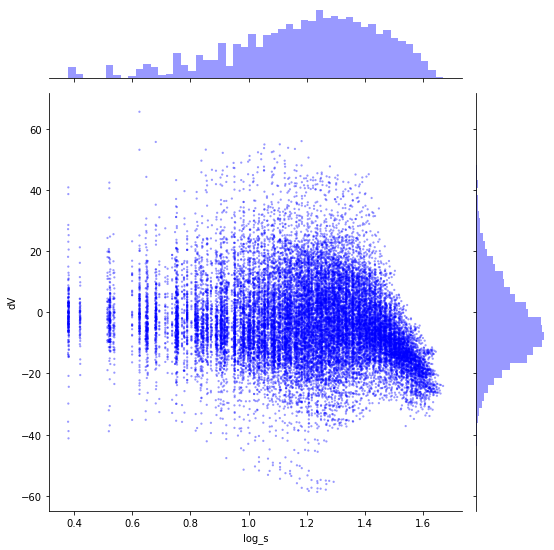

In [15]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.4, s=5, edgecolor='none',color="blue")
ax.fig.set_size_inches(8, 8) 

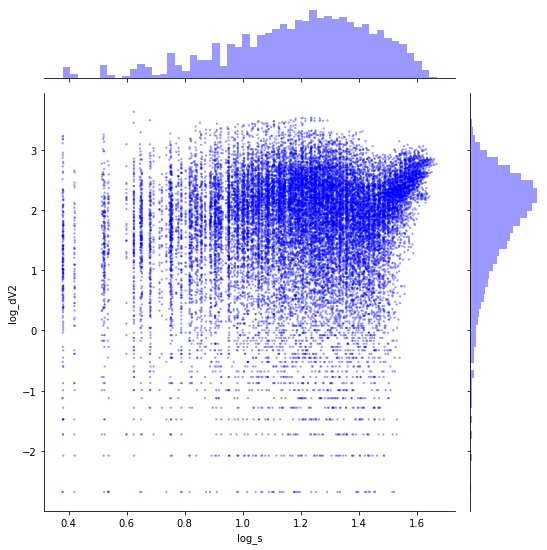

In [16]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.4, s=5, edgecolor='none',color="blue")
ax.fig.set_size_inches(8, 8)

In [17]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [18]:
pairs.s_class[pairs.s_class == 0] = 1

In [19]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
               dV2        log_s
count  1308.000000  1308.000000
mean    109.175800     0.581154
std     264.266075     0.113145
min       0.000000     0.379184
25%       6.312293     0.521034
50%      28.078747     0.624949
75%      98.261006     0.678960
max    4291.015099     0.746943

s_class = 2
                dV2         log_s
count  11447.000000  11447.000000
mean     207.159112      1.057891
std      353.579290      0.136819
min        0.000000      0.750506
25%       20.040746      0.953797
50%       85.991162      1.085312
75%      241.223478      1.173004
max     3450.989812      1.249802

s_class = 3
                dV2         log_s
count  11005.000000  11005.000000
mean     188.526912      1.406651
std      250.023232      0.100931
min        0.000000      1.250248
25%       26.645178   

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Dotted line is 2 x sigma^2 = 187.53


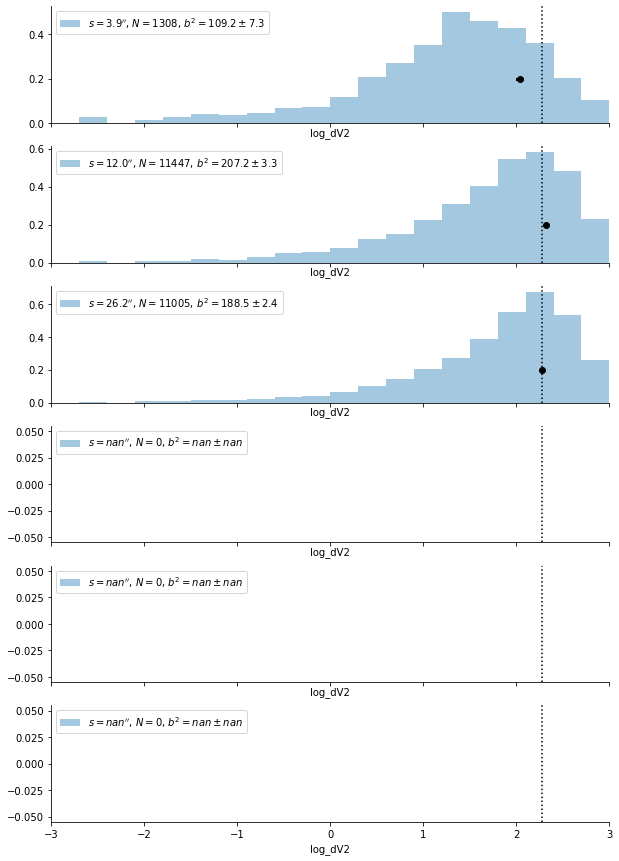

In [20]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass],
                    norm_hist=True, kde=False, ax=ax,
                    label=label, bins=20, hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

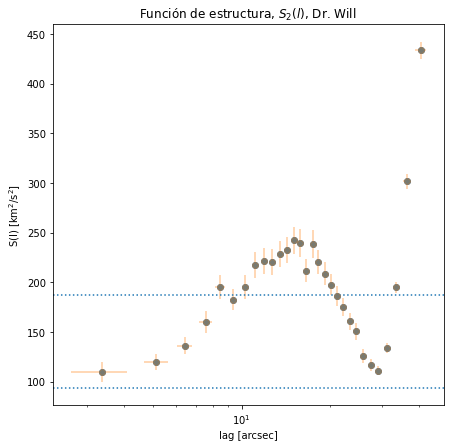

In [21]:
ngroup = 800
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(7, 7))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4)
ax.set(xscale='log')
ax.set(xlabel='lag [arcsec]', ylabel=r'S(l) [km$^{2}$/s$^{2}$]')
plt.title('Función de estructura, $S_{2}(l)$, Dr. Will')
plt.show()

In [22]:
table=[s,b2,e_s,e_b2]
sf=pd.DataFrame(table)
sf=sf.transpose()
sf=sf.set_axis(['Lag', 'Nmqvd', 'ErrX', 'ErrY'], axis=1, inplace=False)
sf

,Lag,Nmqvd,ErrX,ErrY
0,3.361454,109.762773,0.729335,10.281246
1,5.137413,119.639854,0.477015,8.067635
2,6.404510,136.236131,0.385473,8.442957
3,7.546015,159.741035,0.367077,10.927533
4,8.465398,195.201758,0.325435,12.525049
5,9.379537,182.542862,0.266890,10.628944
6,10.234132,195.330174,0.217935,11.798479
7,11.080251,217.330292,0.231805,13.370780
8,11.883942,221.535768,0.256575,13.252303
9,12.630545,220.153543,0.264722,12.974420


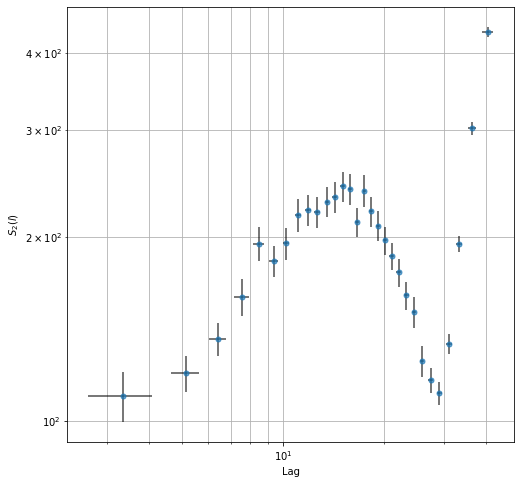

In [23]:
fig, ax=plt.subplots(figsize=(8,8))
ax.errorbar(sf['Lag'],sf['Nmqvd'],xerr=sf.ErrX,yerr=sf.ErrY, fmt="o", ecolor='k', alpha=0.7, markersize=5)
ax.set(xscale='log',yscale='log')
ax.set(xlabel='Lag', ylabel='$S_{2}(l)$')
plt.grid(True, which="both", ls="-")


In [24]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 8.478152990341187 seconds ---
